In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [57]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
df = pd.concat([train, test], ignore_index=True, sort=False)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Missing Data

<AxesSubplot: >

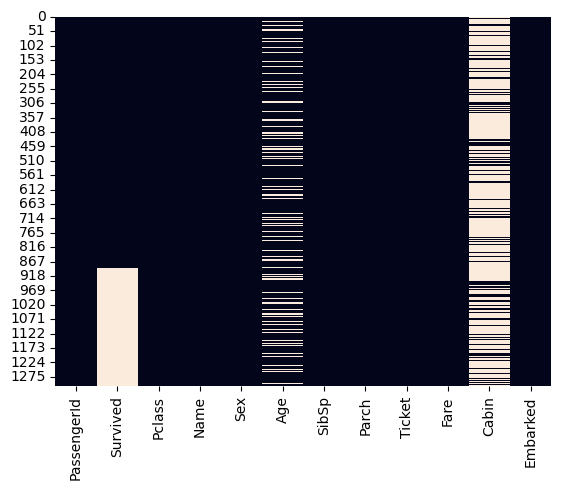

In [58]:
sns.heatmap(df.isnull(), cbar=False)

In [106]:
df.isnull().sum()

PassengerId         0
Survived          418
Pclass              0
Name                0
Sex                 0
Age               263
SibSp               0
Parch               0
Ticket              0
Fare                1
Cabin            1014
Embarked            2
LastName            0
LastNameCount       0
dtype: int64

# Names
## Last Names

In [59]:
df.Name

0                                 Braund, Mr. Owen Harris
1       Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                  Heikkinen, Miss. Laina
3            Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                                Allen, Mr. William Henry
                              ...                        
1304                                   Spector, Mr. Woolf
1305                         Oliva y Ocana, Dona. Fermina
1306                         Saether, Mr. Simon Sivertsen
1307                                  Ware, Mr. Frederick
1308                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [60]:
df['LastName'] = df.Name.apply(lambda x: x.split(',')[0])

In [62]:
last_name_count = df.groupby('LastName').PassengerId.count()\
.reset_index()\
.rename(columns={'PassengerId': 'LastNameCount'})

In [63]:
df = df.merge(last_name_count, on='LastName', how='left')

In [ ]:
sns.barplot(df, x='LastNameCount', y=)

## Titles

In [109]:
def extract_title(s):
    titles = [w for w in s.split(' ') if w.endswith('.')]
    if len(titles) == 1:
        return titles[0]
    else:
        return None

In [111]:
df['Title'] = df.Name.apply(extract_title)

<AxesSubplot: xlabel='Title', ylabel='Count'>

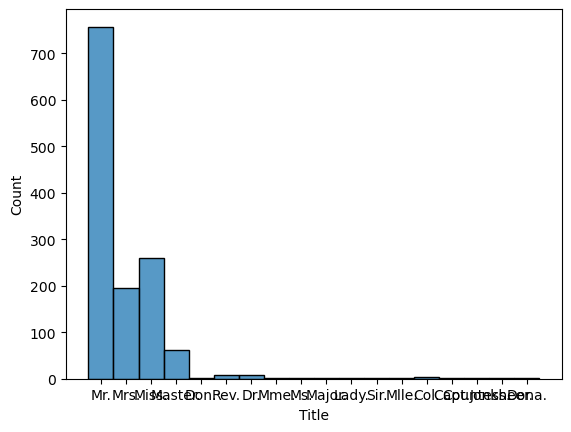

In [112]:
sns.histplot(df.Title)

In [116]:
df.Title.value_counts()

Mr.          757
Miss.        260
Mrs.         196
Master.       61
Rev.           8
Dr.            8
Col.           4
Mlle.          2
Major.         2
Ms.            2
Lady.          1
Sir.           1
Mme.           1
Don.           1
Capt.          1
Countess.      1
Jonkheer.      1
Dona.          1
Name: Title, dtype: int64

# Age